## Loan Prediction

**Analytics Vidya**

In [5]:
import pandas as pd
import numpy as np

In [6]:
import os
print(os.getcwd())

C:\Users\hp\Desktop\Spring_22\Analytics_Vidya


In [7]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [8]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [9]:
print("Shape of training data : ", train.shape)
print("Shape of testing data : ", test.shape)

Shape of training data :  (614, 13)
Shape of testing data :  (367, 12)


In [10]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
columns = train.columns
for c in columns:
    print(c)
    uniq_counts = train[c].nunique()
    print(uniq_counts)

Loan_ID
614
Gender
2
Married
2
Dependents
4
Education
2
Self_Employed
2
ApplicantIncome
505
CoapplicantIncome
287
LoanAmount
203
Loan_Amount_Term
10
Credit_History
2
Property_Area
3
Loan_Status
2


In [13]:
#print(train.Property_Area.unique())
print(train['Dependents'].value_counts())
print(train['Property_Area'].value_counts())

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [14]:
train[train.Gender.isna() == True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


#### Approach-1 : Dropping missing values

In [15]:
train1 = train.copy()
train1.dropna(inplace=True)
print(train1.shape)

(480, 13)


##### Data preprocessing

array([[<AxesSubplot:xlabel='ApplicantIncome', ylabel='ApplicantIncome'>,
        <AxesSubplot:xlabel='CoapplicantIncome', ylabel='ApplicantIncome'>,
        <AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>,
        <AxesSubplot:xlabel='Loan_Amount_Term', ylabel='ApplicantIncome'>,
        <AxesSubplot:xlabel='Credit_History', ylabel='ApplicantIncome'>],
       [<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>,
        <AxesSubplot:xlabel='CoapplicantIncome', ylabel='CoapplicantIncome'>,
        <AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>,
        <AxesSubplot:xlabel='Loan_Amount_Term', ylabel='CoapplicantIncome'>,
        <AxesSubplot:xlabel='Credit_History', ylabel='CoapplicantIncome'>],
       [<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>,
        <AxesSubplot:xlabel='CoapplicantIncome', ylabel='LoanAmount'>,
        <AxesSubplot:xlabel='LoanAmount', ylabel='LoanAmount'>,
        <AxesSubplot:xlabel='Loan_Amount_Term', yl

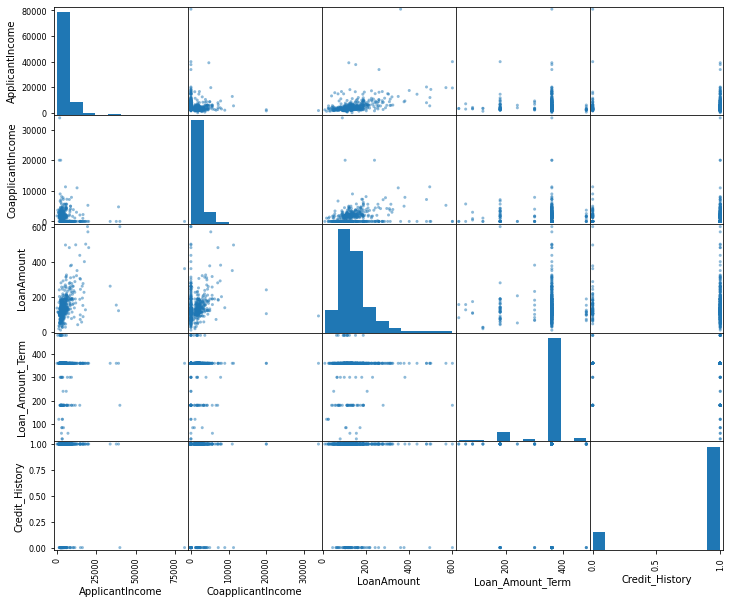

In [16]:
pd.plotting.scatter_matrix(train1, figsize=(12,10))

In [17]:
train1.Gender.value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [18]:
train1.groupby('Gender').Married.value_counts()

Gender  Married
Female  No          61
        Yes         25
Male    Yes        286
        No         108
Name: Married, dtype: int64

In [19]:
train1[train1.Loan_Status == "Y"].groupby('Gender')['Credit_History'].value_counts()

Gender  Credit_History
Female  1.0                53
        0.0                 1
Male    1.0               272
        0.0                 6
Name: Credit_History, dtype: int64

In [20]:
train1[train1.Loan_Status == "Y"]['Education'].value_counts()

Graduate        271
Not Graduate     61
Name: Education, dtype: int64

In [21]:
train1[train1.Loan_Status == "Y"]['Self_Employed'].value_counts()

No     289
Yes     43
Name: Self_Employed, dtype: int64

We observed the below points:
- 

In [22]:
train1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [28]:
from sklearn.preprocessing import OrdinalEncoder
categorical_col = ['Gender','Married', 'Dependents', 'Education','Self_Employed','Credit_History',
                   'Property_Area','Loan_Status']
encoder = OrdinalEncoder()
for col in categorical_col :
    train1[col] = encoder.fit_transform(train1[[col]])
print(train1.head())

    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
1  LP001003     1.0      1.0         1.0        0.0            0.0   
2  LP001005     1.0      1.0         0.0        0.0            1.0   
3  LP001006     1.0      1.0         0.0        1.0            0.0   
4  LP001008     1.0      0.0         0.0        0.0            0.0   
5  LP001011     1.0      1.0         2.0        0.0            1.0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History  Property_Area  Loan_Status  
1             1.0            0.0          0.0  
2             1.0            2.0          1.0  
3       

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [29]:
train2 = train1.copy()
minmax = MinMaxScaler()
numerical_col = ['ApplicantIncome',  'CoapplicantIncome',  'LoanAmount',  'Loan_Amount_Term']
for n in numerical_col :
    train2[n] = minmax.fit_transform(train2[[n]])
print(train2.head())

    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
1  LP001003     1.0      1.0         1.0        0.0            0.0   
2  LP001005     1.0      1.0         0.0        0.0            1.0   
3  LP001006     1.0      1.0         0.0        1.0            0.0   
4  LP001008     1.0      0.0         0.0        0.0            0.0   
5  LP001011     1.0      1.0         2.0        0.0            1.0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1         0.054830           0.044567    0.201354           0.72973   
2         0.035250           0.000000    0.096447           0.72973   
3         0.030093           0.069687    0.187817           0.72973   
4         0.072356           0.000000    0.223350           0.72973   
5         0.065145           0.124006    0.436548           0.72973   

   Credit_History  Property_Area  Loan_Status  
1             1.0            0.0          0.0  
2             1.0            2.0          1.0  
3       

##### Models 
- Linear Regression
- Logistic Regression
- Decision tree
- Random Forest
- k-NN
- Simple Neural Network

In [40]:
from sklearn.model_selection import train_test_split
train2 = train1.copy()
y = train2['Loan_Status']
X = train2.drop(columns = ['Loan_Status','Loan_ID'], axis=1)
X_train,X_test,y_train,y_test  = train_test_split(X,y, test_size = 0.2, random_state =42)

In [42]:
## Linear Regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train,y_train)
linreg.score(X_train,y_train)

0.29324354234352745

In [45]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train,y_train)
logreg.score(X_train,y_train)

0.8046875

In [51]:
logreg.score(X_test,y_test)

0.8229166666666666

In [49]:
## KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)
knn.score(X_train,y_train)

0.7421875

In [50]:
knn.score(X_test,y_test)

0.65625

In [54]:
## Decision tree 
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(X_train, y_train)
dtc.score(X_train, y_train)

1.0

In [55]:
dtc.score(X_test,y_test)

0.7604166666666666

In [56]:
##Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier().fit(X_train, y_train)
rfc.score(X_train,y_train)

1.0

In [57]:
rfc.score(X_test,y_test)

0.8020833333333334

In [60]:
##Extra trees
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier().fit(X_train, y_train)
etc.score(X_train,y_train)

1.0

In [61]:
etc.score(X_test, y_test)

0.7916666666666666

In [68]:
## Neuarl Network - Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1).fit(X,y)
mlp.score(X_train,y_train)

0.6875

In [69]:
mlp.score(X_test,y_test)

0.7083333333333334

In [78]:
train3 = train.dropna()
train3.shape

(480, 13)

In [106]:
categorical_col = ['Gender','Married', 'Dependents', 'Education','Self_Employed','Credit_History',
                   'Property_Area']

In [107]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
num = ohe.fit_transform(train3[categorical_col]).toarray()

In [108]:
num.shape

(480, 17)

In [109]:
ohe.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['0', '1', '2', '3+'], dtype=object),
 array(['Graduate', 'Not Graduate'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array([0., 1.]),
 array(['Rural', 'Semiurban', 'Urban'], dtype=object)]

In [113]:
col_ohe = ohe.get_feature_names(categorical_col)

In [148]:
train4=train3.drop(columns=categorical_col)

In [149]:
train4.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
1,LP001003,4583,1508.0,128.0,360.0,N
2,LP001005,3000,0.0,66.0,360.0,Y
3,LP001006,2583,2358.0,120.0,360.0,Y
4,LP001008,6000,0.0,141.0,360.0,Y
5,LP001011,5417,4196.0,267.0,360.0,Y


In [150]:
df_ohe = pd.DataFrame(num, columns = col_ohe,index = train4.index)
df_ohe.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [151]:
train4 = pd.concat([train4, df_ohe],axis=1)

In [152]:
train4

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,4583,1508.0,128.0,360.0,N,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,LP001005,3000,0.0,66.0,360.0,Y,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,LP001006,2583,2358.0,120.0,360.0,Y,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,LP001008,6000,0.0,141.0,360.0,Y,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5,LP001011,5417,4196.0,267.0,360.0,Y,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.0,360.0,Y,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
610,LP002979,4106,0.0,40.0,180.0,Y,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
611,LP002983,8072,240.0,253.0,360.0,Y,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
612,LP002984,7583,0.0,187.0,360.0,Y,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [153]:
train4.shape

(480, 23)

In [154]:
loan_status_dict = {
    'N':0,
    'Y':1
}
train4 = train4.replace({'Loan_Status':loan_status_dict})

In [155]:
train4.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,4583,1508.0,128.0,360.0,0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,LP001005,3000,0.0,66.0,360.0,1,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,LP001006,2583,2358.0,120.0,360.0,1,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,LP001008,6000,0.0,141.0,360.0,1,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5,LP001011,5417,4196.0,267.0,360.0,1,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [156]:
ss = StandardScaler()
train4[numerical_col] = ss.fit_transform(train4[numerical_col])
train4.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,-0.137970,-0.027952,-0.208089,0.275542,0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,LP001005,-0.417536,-0.604633,-0.979001,0.275542,1,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,LP001006,-0.491180,0.297100,-0.307562,0.275542,1,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,LP001008,0.112280,-0.604633,-0.046446,0.275542,1,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5,LP001011,0.009319,0.999978,1.520245,0.275542,1,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [157]:
y = train4['Loan_Status']
X = train4.drop(columns = ["Loan_Status","Loan_ID"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [158]:
X_train.isna().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Credit_History_0.0         0
Credit_History_1.0         0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [159]:
logreg_ohe_ss = LogisticRegression().fit(X_train, y_train)
print("Mean train accuracy: ", logreg_ohe_ss.score(X_train, y_train))
print("Mean test accuracy: ", logreg_ohe_ss.score(X_test,y_test))

Mean train accuracy:  0.8072916666666666
Mean test accuracy:  0.8229166666666666


#### Approach -2 : imputation

In [201]:
categorical_col,numerical_col

(['Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Credit_History',
  'Property_Area'],
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])

In [209]:
train.shape

(614, 13)

In [210]:
train_2 = train.copy()

In [212]:
for n in numerical_col :
    train_2[n].fillna(train_2[n].mean(),inplace=True)
for c in categorical_col :
    train_2[c].fillna(train_2[c].mode()[0],inplace=True)

In [205]:
for n in numerical_col:
    print(train_2[n].mean())

5403.459283387622
1621.245798027101
146.41216216216213
342.0


In [214]:
train_2.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

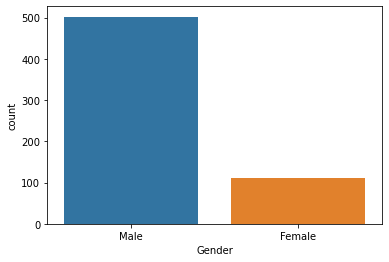

In [207]:
sns.countplot(x='Gender', data=train_2)

In [215]:
train_3 = pd.get_dummies(data=train_2, columns=categorical_col)
#for n in numerical_col:
#    train_3[n] = np.log(train_3[n])

In [220]:
train_3.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0.072991,-0.554487,0.000000,0.279851,1,0,1,1,0,...,0,1,0,1,0,0,1,0,0,1
1,LP001003,-0.134412,-0.038732,-0.219273,0.279851,0,0,1,0,1,...,0,1,0,1,0,0,1,1,0,0
2,LP001005,-0.393747,-0.554487,-0.957641,0.279851,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
3,LP001006,-0.462062,0.251980,-0.314547,0.279851,1,0,1,0,1,...,0,0,1,1,0,0,1,0,0,1
4,LP001008,0.097728,-0.554487,-0.064454,0.279851,1,0,1,1,0,...,0,1,0,1,0,0,1,0,0,1


In [217]:
train_3[numerical_col] = StandardScaler().fit_transform(train_3[numerical_col])


In [219]:
train_3=train_3.replace({'Loan_Status':loan_status_dict})

In [221]:
y = train_3['Loan_Status']
X = train_3.drop(columns =['Loan_ID','Loan_Status'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [222]:
logreg=LogisticRegression().fit(X_train,y_train)
print("Train accuracy : ",logreg.score(X_train, y_train))
print("Test accuracy : ",logreg.score(X_test, y_test))

Train accuracy :  0.8187372708757638
Test accuracy :  0.7886178861788617


In [224]:
dtc=DecisionTreeClassifier().fit(X_train,y_train)
print("Train accuracy : ",dtc.score(X_train, y_train))
print("Test accuracy : ",dtc.score(X_test, y_test))

Train accuracy :  1.0
Test accuracy :  0.6747967479674797


In [256]:
test = pd.read_csv('test.csv')

In [262]:
test.shape

(367, 21)

In [258]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [259]:
for n in numerical_col :
    test[n].fillna(test[n].mean(),inplace=True)
for c in categorical_col :
    test[c].fillna(test[c].mode()[0],inplace=True)

test = pd.get_dummies(data=test, columns=categorical_col)
test[numerical_col] = StandardScaler().fit_transform(test[numerical_col])

In [261]:
Loan_ID = test.Loan_ID
test=test.drop('Loan_ID',axis =1)

In [239]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.186461,-0.673335,-0.429368,0.270603,0,1,0,1,1,0,...,0,1,0,1,0,0,1,0,0,1
1,-0.352692,-0.029848,-0.166482,0.270603,0,1,0,1,0,1,...,0,1,0,1,0,0,1,0,0,1
2,0.039641,0.098849,1.180807,0.270603,0,1,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
3,-0.502774,0.418877,-0.593671,0.270603,0,1,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
4,-0.311909,-0.673335,-0.955139,0.270603,0,1,1,0,1,0,...,0,0,1,1,0,0,1,0,0,1


In [264]:
pred = logreg.predict(test)

In [266]:
pred.shape

(367,)

In [267]:
submission = pd.DataFrame(pred, columns= ['Loan_Status'])

In [268]:
sub_loan_status_dict = {1:'Y',0:'N'}
submission = submission.replace({'Loan_Status':sub_loan_status_dict})
submission['Loan_ID'] = Loan_ID 

In [269]:
submission.head()

,Loan_Status,Loan_ID
0,Y,LP001015
1,Y,LP001022
2,Y,LP001031
3,Y,LP001035
4,Y,LP001051


In [270]:
submission = submission[['Loan_ID','Loan_Status']]

In [271]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

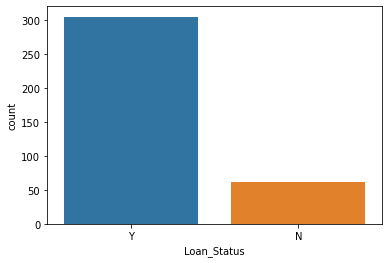

In [272]:
sns.countplot(x='Loan_Status',data= submission)

In [273]:
submission.shape

(367, 2)

In [276]:
submission.to_csv(r'submission.csv',index=False)